### Exploratory Data Analysis - EDA
- EDA
- Visualize our data
- Categorical Data (data that falls in into discrete categories) and data aggregation.
- Summarize numerical data

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>title</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td><a href="https://player.vimeo.com/video/656355010?h=3cc6a34eba">https://player.vimeo.com/video/656355010?h=3cc6a34eba</a></td>
      <td>Getting Started</td>
    </tr>
    <tr>
      <th>1</th>
      <td><a href="https://player.vimeo.com/video/656354357?h=8d99bdbfcd">https://player.vimeo.com/video/656354357?h=8d99bdbfcd</a></td>
      <td>Import CSV</td>
    </tr>
    <tr>
      <th>2</th>
      <td><a href="https://player.vimeo.com/video/656353826?h=236e9c5d43">https://player.vimeo.com/video/656353826?h=236e9c5d43</a></td>
      <td>Scatter mapbox plot</td>
    </tr>
    <tr>
      <th>3</th>
      <td><a href="https://player.vimeo.com/video/656353463?h=ee8bffd02b">https://player.vimeo.com/video/656353463?h=ee8bffd02b</a></td>
      <td>Most Common States</td>
    </tr>
    <tr>
      <th>4</th>
      <td><a href="https://player.vimeo.com/video/656353149?h=2d5b273746">https://player.vimeo.com/video/656353149?h=2d5b273746</a></td>
      <td>Summary Statistics</td>
    </tr>
    <tr>
      <th>5</th>
      <td><a href="https://player.vimeo.com/video/656352616?h=6075fbacb5">https://player.vimeo.com/video/656352616?h=6075fbacb5</a></td>
      <td>Histogram of Area</td>
    </tr>
    <tr>
      <th>6</th>
      <td><a href="https://player.vimeo.com/video/656352166?h=5531b6e160">https://player.vimeo.com/video/656352166?h=5531b6e160</a></td>
      <td>Boxplot of Area</td>
    </tr>
    <tr>
      <th>7</th>
      <td><a href="https://player.vimeo.com/video/656351977?h=a0868bd01e">https://player.vimeo.com/video/656351977?h=a0868bd01e</a></td>
      <td>Histogram of Price</td>
    </tr>
    <tr>
      <th>8</th>
      <td><a href="https://player.vimeo.com/video/656351234?h=44ca8af7ac">https://player.vimeo.com/video/656351234?h=44ca8af7ac</a></td>
      <td>Boxplot of price</td>
    </tr>
  </tbody>
</table>

In [34]:
# importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

#### EDA

In [35]:
df = pd.read_csv("./mexico-real-estate-clean.csv")
print(df.shape)
print(df.info())
df.head()

(1736, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB
None


,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37


#### Visualization of Data

In [36]:
fig = px.scatter_map(
    df,
    lat=df["lat"],
    lon=df["lon"],
    center={"lat":19.43, "lon": -99.13}, #Map will be centered around mexico city
    width=600,
    height=600,
    hover_data=["price_usd"] # Diplay price when hovering mouse over house}
    )

In [ ]:
fig, ax = plt.subplots()
ax.xaxis

In [37]:
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [38]:
df["state"].nunique() #Number of unique items from this column

30

In [39]:
df["state"].unique() #Array of all the unique items in this column

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [40]:
df["state"].value_counts().head(10) # This will give a series of how many times each unique value has appeared in the column

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
Chiapas                             55
Name: count, dtype: int64

##### Decriptive Statistics
- <p style="color:yellow">Descriptive statistics is the branch of statistics that summarizes, organizes, and presents data in a meaningful way without making inferences beyond the data itself.

In [41]:
df.columns

Index(['property_type', 'state', 'lat', 'lon', 'area_m2', 'price_usd'], dtype='object')

In [42]:
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


<p style="color:yellow"> Histogram for Distribution of data according to the frequency of the area</p>

Text(0.5, 1.0, 'Distribution of Home Sizes')

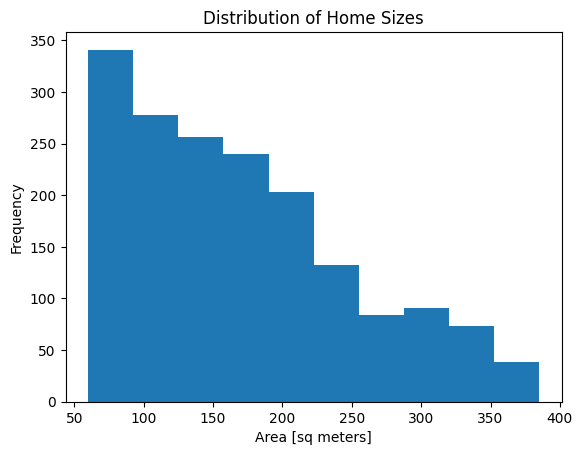

In [43]:
# creating a histogram for area
plt.hist(df["area_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of Home Sizes")

<p style="color:yellow">Box plot for Area</p>
- The box plot is also known as the box and whiskers plot. <br>
- The box in the box plot shows where is 50% of the data located. <br>
- The ends of the boxes till whiskers shows where the 25% and 75% are. <br>

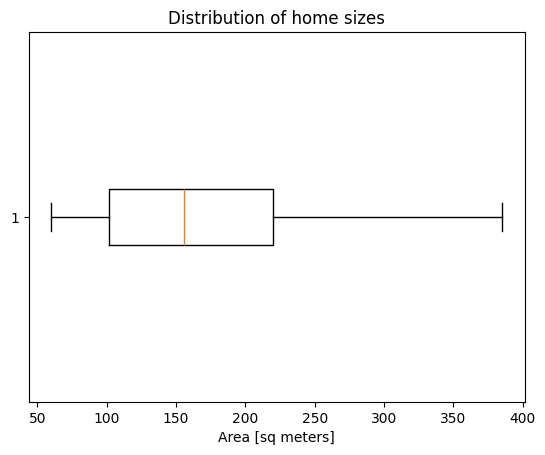

In [44]:
plt.boxplot(df["area_m2"], vert=False)
plt.xlabel("Area [sq meters]")
plt.title("Distribution of home sizes");

<p style="color:yellow"> Histogram of Price </p>

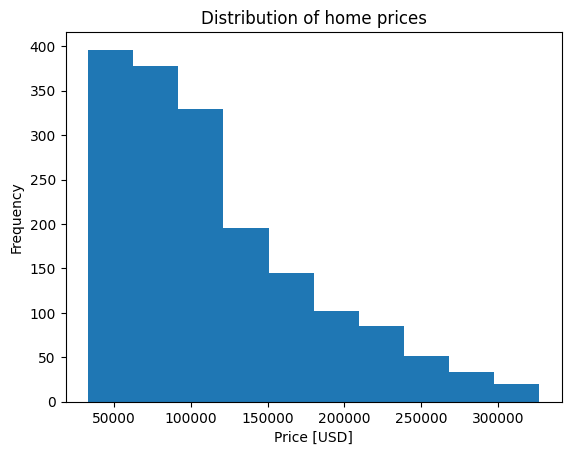

In [45]:
plt.hist(df["price_usd"])
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
plt.title("Distribution of home prices");

<p style="color:yellow"> Box plot of House Prices </p>

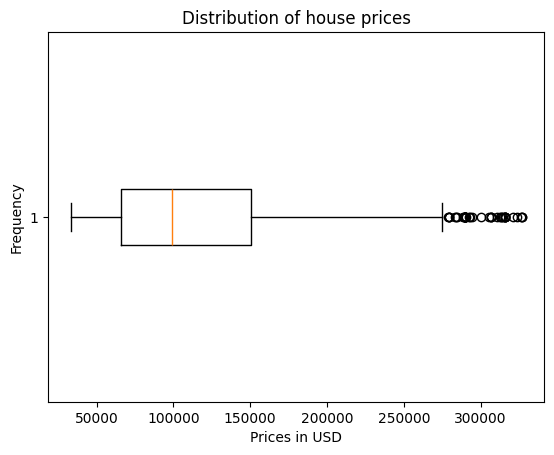

In [46]:
plt.boxplot(df["price_usd"],vert=False)
plt.xlabel("Prices in USD")
plt.ylabel("Frequency")
plt.title("Distribution of house prices");

<p style="color:orange; font-size:30px">If that value is more than three standard deviations away from your mean, are known as the outliers</p>
- Box plot helps us identify where the outliers are.